In [1]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### 데이터 불러오기

In [2]:
hd_df = pd.read_excel('data4/hyundaiCar.xlsx')

x_data = hd_df.drop('종류', axis = 1)
y_data = hd_df[['종류']]

### train test split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, stratify=y_data)

### 인코딩

In [4]:
ct = make_column_transformer((OneHotEncoder(), ['연료', '변속기']), remainder = 'passthrough')

## I) KNN

In [5]:
model_knn = make_pipeline( ct, StandardScaler(), KNeighborsClassifier(n_neighbors = 2) )
model_knn.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

### I i) KNN_predict

In [6]:
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns
print('KNN 예측 :', model_knn.predict(a), '\n')

KNN 예측 : ['소형'] 



### I ii) KNN_f1 score

In [7]:
print('KNN train f1 score : ', metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'))
print('KNN test f1 score : ', metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'))

KNN train f1 score :  0.8434925906231501
KNN test f1 score :  0.6284722222222223


### I iii) KNN_confusion matrix

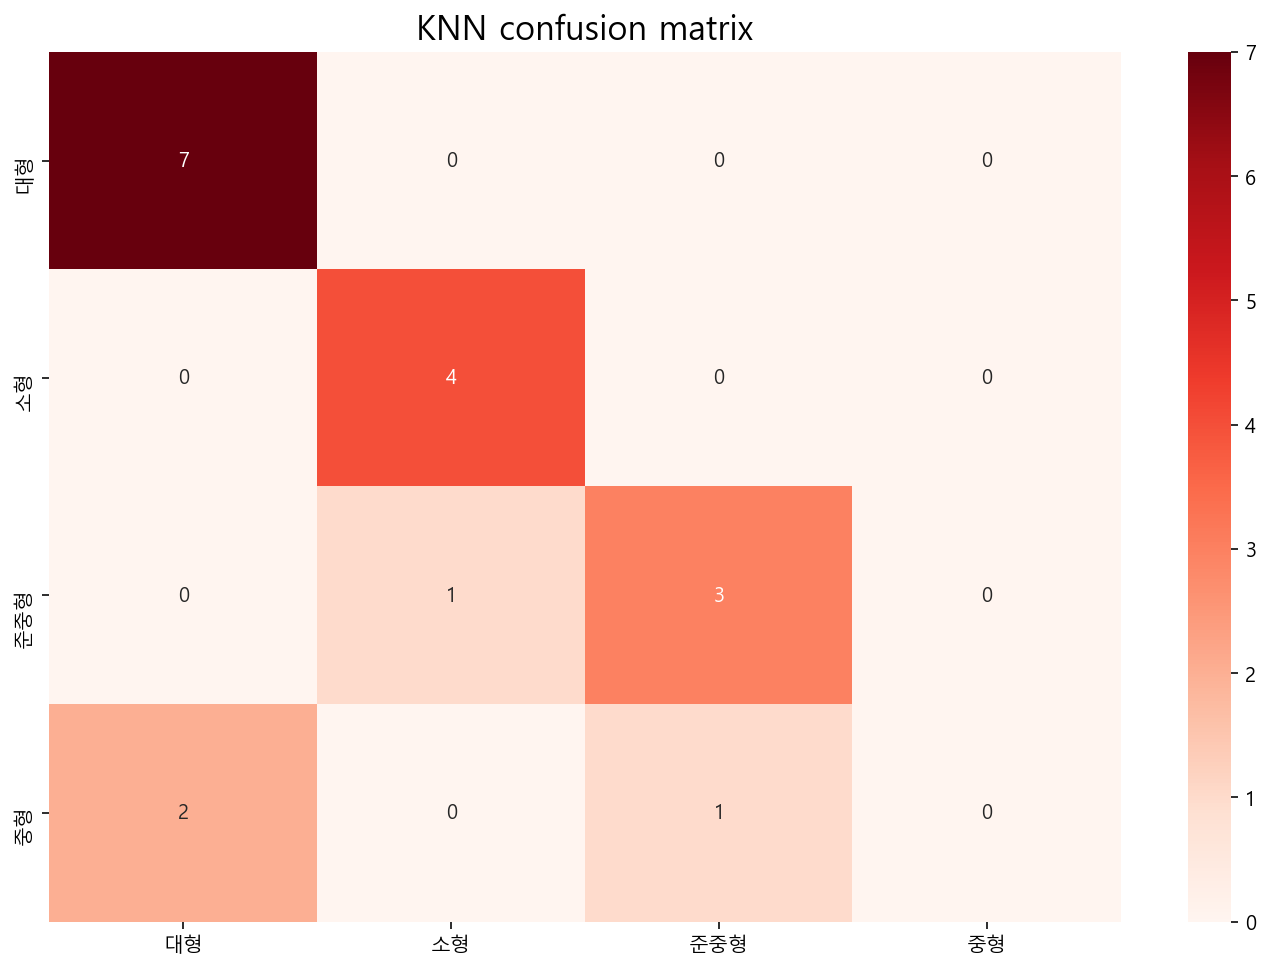

In [8]:
y_predict = model_knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12,8))
sns.heatmap(cm_knn, annot=True, cmap='Reds', yticklabels=['대형', '소형', '준중형', '중형'], 
            xticklabels=['대형', '소형', '준중형', '중형'])
plt.rc('font', size=14) 
plt.title('KNN confusion matrix')
plt.show()

## II) Decision Tree

In [9]:
model_tree_pipe = make_pipeline(ct,StandardScaler(),DecisionTreeClassifier())
param_grid = {'decisiontreeclassifier__max_depth' : range(1,5),
             'decisiontreeclassifier__max_features': np.arange(0.1,1,0.1)}
grid_tree = GridSearchCV(model_tree_pipe, param_grid= param_grid, scoring='f1_macro')
grid_tree.fit(x_train,y_train)
print('decision tree best params : ',grid_tree.best_params_)
model_tree = grid_tree.best_estimator_

decision tree best params :  {'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_features': 0.5}


### II i) Decision Tree_predict

In [10]:
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns
print('Decision Tree 예측 :', model_tree.predict(a), '\n')

Decision Tree 예측 : ['소형'] 



### II ii) Decision Tree_f1 score

In [11]:
print('Decision tree train f1 score : ', metrics.f1_score(y_train, model_tree.predict(x_train), average='macro'))
print('Decision tree test f1 score : ', metrics.f1_score(y_test, model_tree.predict(x_test), average='macro'))

Decision tree train f1 score :  0.9641148325358851
Decision tree test f1 score :  0.8305555555555556


### II iii) Decision Tree_confusion matrix

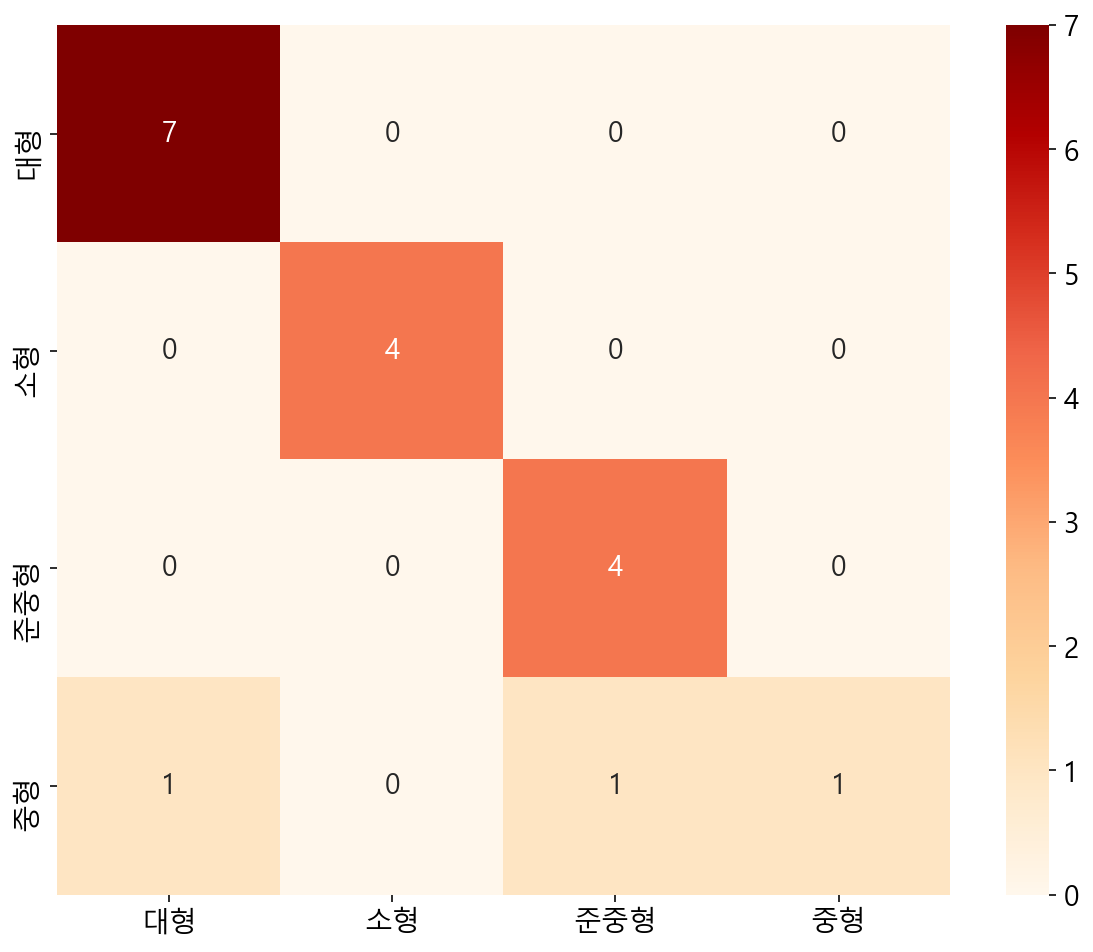

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(metrics.confusion_matrix(y_test, model_tree.predict(x_test)), annot = True, 
            xticklabels=model_tree.classes_, yticklabels=model_tree.classes_, cmap = 'OrRd')
plt.rc('font', size=14) 
plt.show()

## III) Naive Bayes

In [41]:
model_nb_pipe=make_pipeline(ct, GaussianNB())
model_nb_pipe.fit(x_data,y_data)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('gaussiannb', GaussianNB())])

### III i) Naive Bayes_predict

In [42]:
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns
print('Naive Bayes 예측 :', model_nb_pipe.predict(a), '\n')

Naive Bayes 예측 : ['소형'] 



### III ii) Naive Bayes_f1 score

In [43]:
print('Naive Bayes train f1 score : ', metrics.f1_score(y_train, model_nb_pipe.predict(x_train), average='macro'))
print('Naive Bayes test f1 score : ', metrics.f1_score(y_test, model_nb_pipe.predict(x_test), average='macro'))

Naive Bayes train f1 score :  0.7770135566188198
Naive Bayes test f1 score :  0.6423076923076922


### III iii) Naive Bayes_confusion matrix

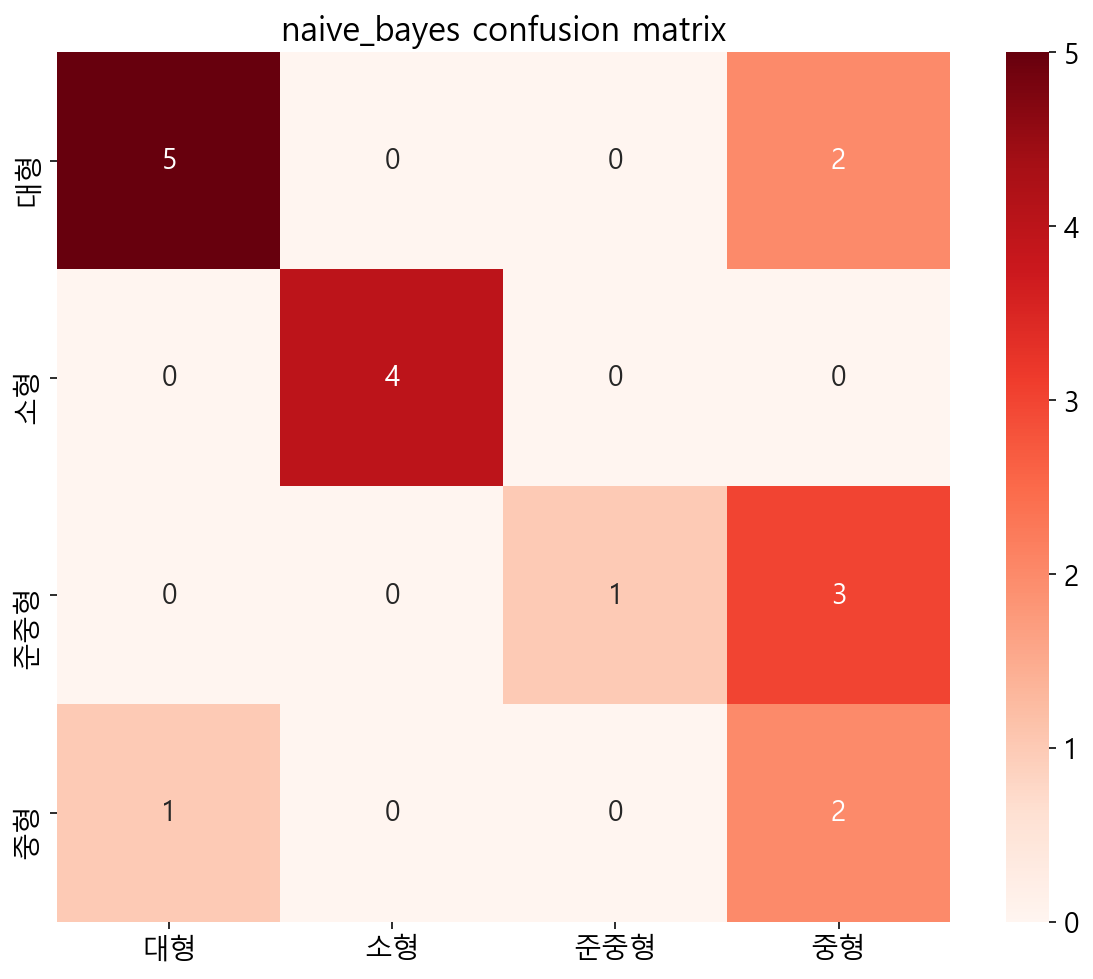

In [16]:
y_pred = model_nb_pipe.predict(x_test)
cm_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm_nb, annot=True, cmap='Reds', yticklabels=['대형', '소형', '준중형', '중형'], 
            xticklabels=['대형', '소형', '준중형', '중형'])
plt.rc('font', size=14) 
plt.title('naive_bayes confusion matrix')
plt.show()

## IV) SVC

In [17]:
model_svc=make_pipeline(ct, StandardScaler(), SVC())
print(model_svc.fit(x_data,y_data))
param_value = {'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'svc__C': range(1,11), 'svc__gamma': ['scale', 'auto']}
gridS = GridSearchCV(model_svc, param_grid=param_value, scoring='f1', verbose=1)
gridS.fit(x_train, y_train)
print('SVC best params : ',gridS.best_params_)
model_tree = gridS.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['연료', '변속기'])])),
                ('standardscaler', StandardScaler()), ('svc', SVC())])
Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVC best params :  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


### IV i) SVC_predict

In [18]:
a = [1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']
a = pd.DataFrame(a).T
a.columns = x_data.columns
print('SVC 예측 :', model_svc.predict(a), '\n')

SVC 예측 : ['소형'] 



### IV ii) SVC_f1 score

In [19]:
print('SVC train f1 score : ', metrics.f1_score(y_train, model_svc.predict(x_train), average='macro'))
print('SVC test f1 score : ', metrics.f1_score(y_test, model_svc.predict(x_test), average='macro'))

SVC train f1 score :  0.8824575024517816
SVC test f1 score :  0.7708333333333334


### IV iii) SVC_confusion matrix

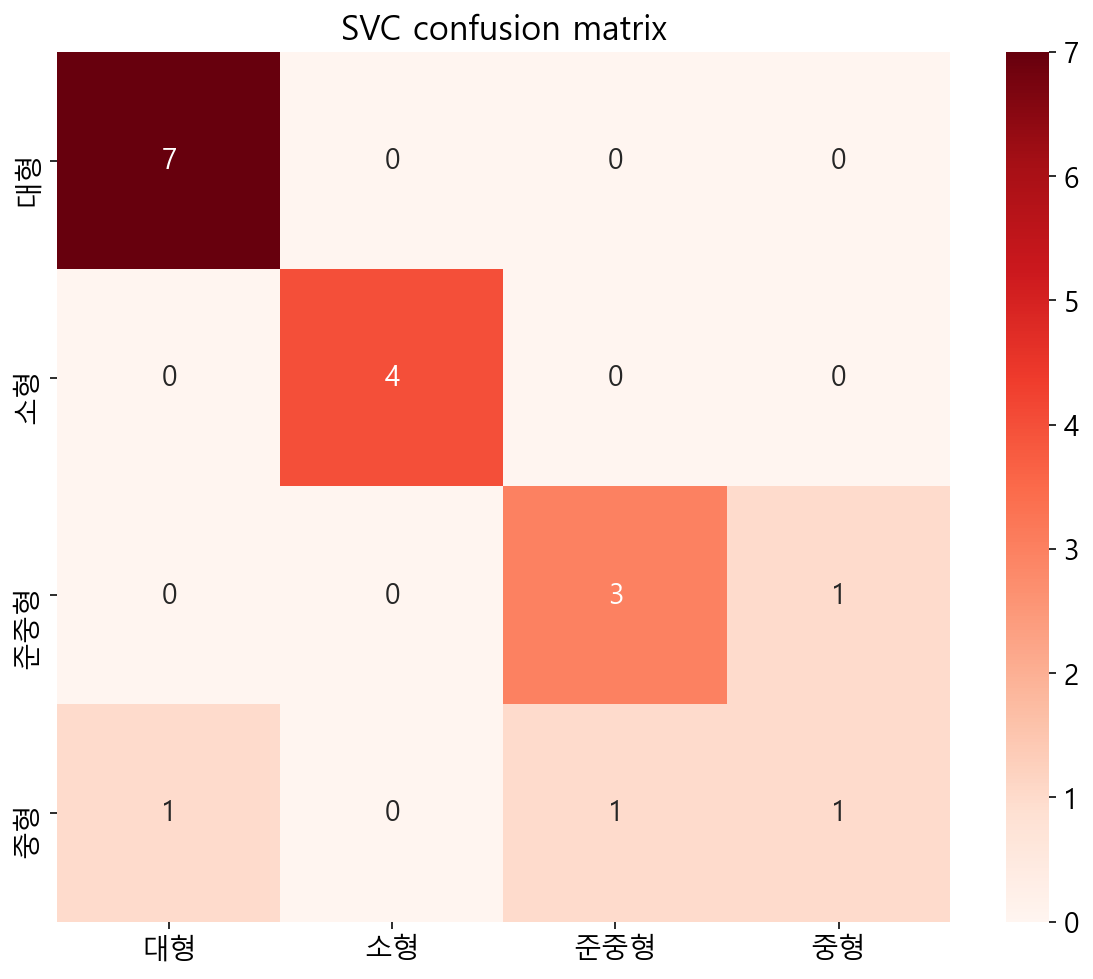

In [20]:
y_pred = model_svc.predict(x_test)
cm_svc = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm_svc, annot=True, cmap='Reds', yticklabels=['대형', '소형', '준중형', '중형'], 
            xticklabels=['대형', '소형', '준중형', '중형'])
plt.rc('font', size=14) 
plt.title('SVC confusion matrix')
plt.show()

### f1 score_bar chart(train)

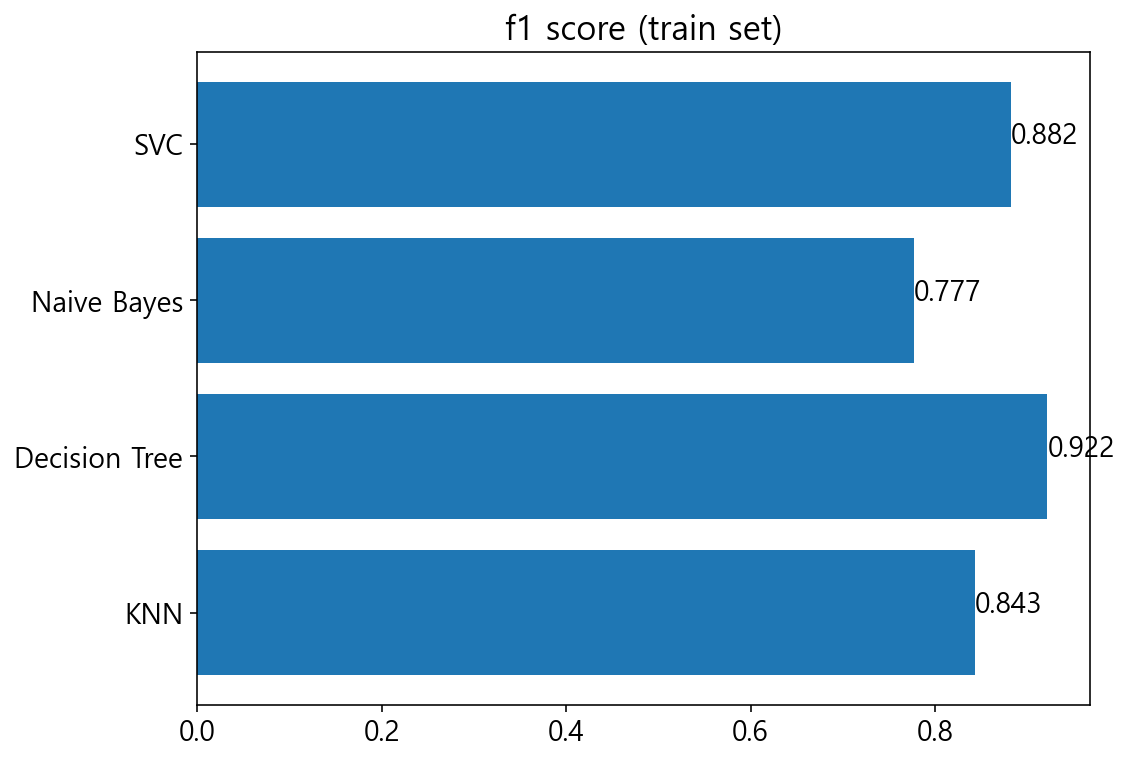

In [37]:
plt.figure(figsize = (8,6))
plt.barh(['KNN', 'Decision Tree', 'Naive Bayes', 'SVC'], [metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_tree.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_nb_pipe.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_svc.predict(x_train), average='macro')])
f1_score_train = [metrics.f1_score(y_train, model_knn.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_tree.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_nb_pipe.predict(x_train), average='macro'), 
        metrics.f1_score(y_train, model_svc.predict(x_train), average='macro')]
for i, v in enumerate(f1_score_train):
    plt.text(v, i, str(np.round(v,3)))
plt.title('f1 score (train set)')
plt.show()

### f1 score_bar chart(test)

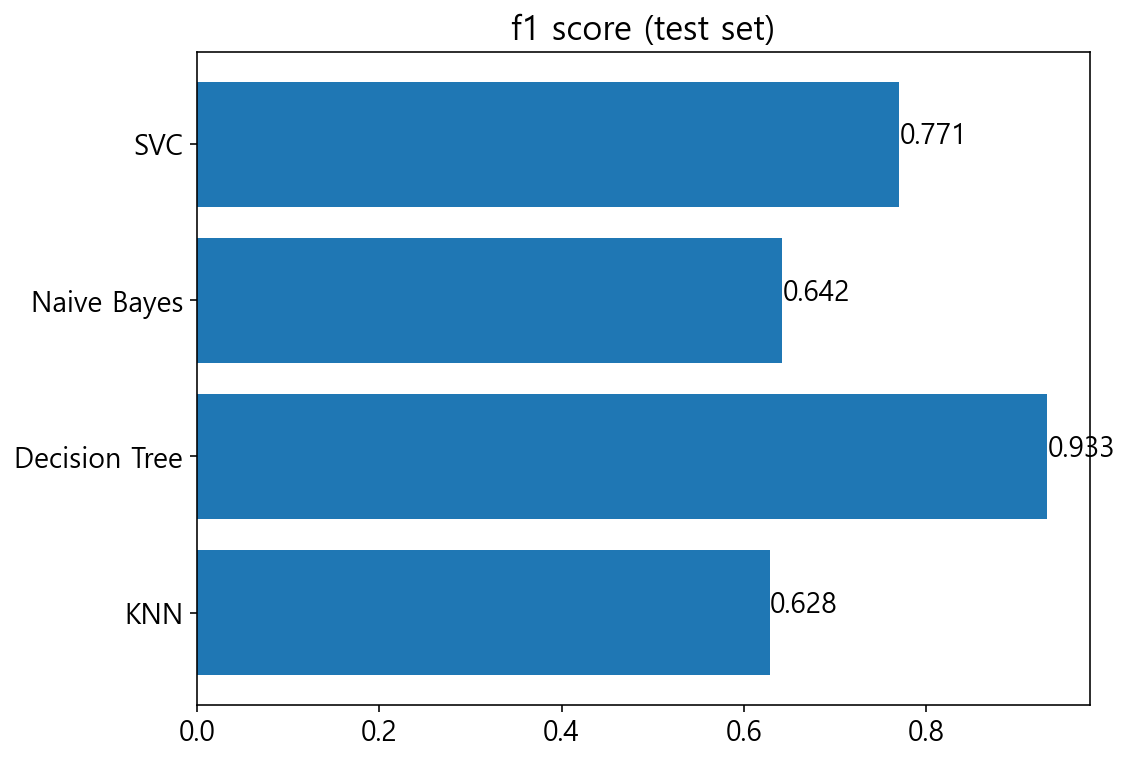

In [36]:
plt.figure(figsize = (8,6))
plt.barh(['KNN', 'Decision Tree', 'Naive Bayes', 'SVC'], [metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_tree.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_nb_pipe.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_svc.predict(x_test), average='macro')])
f1_score_test = [metrics.f1_score(y_test, model_knn.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_tree.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_nb_pipe.predict(x_test), average='macro'), 
        metrics.f1_score(y_test, model_svc.predict(x_test), average='macro')]
for i, v in enumerate(f1_score_test):
    plt.text(v, i, str(np.round(v,3)))
plt.title('f1 score (test set)')
plt.show()